In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

## Библиотеки

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold,
                                     StratifiedShuffleSplit, RepeatedStratifiedKFold, validation_curve, cross_validate)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report,
                             confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay,
                             ConfusionMatrixDisplay, balanced_accuracy_score, average_precision_score,
                             mean_absolute_percentage_error)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.compose import ColumnTransformer, make_column_transformer
from collections import Counter
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.impute import SimpleImputer, IterativeImputer
import matplotlib.colors as mcolors
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, QuantileTransformer, PowerTransformer
from sklearn.model_selection import train_test_split 

from sklearn.preprocessing import PolynomialFeatures

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor\

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

from sklearn.metrics import mean_absolute_percentage_error
from sklearn import svm
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

pd.set_option('display.max_columns', None)  # Отображать все колонки

from sklearn.compose import ColumnTransformer, make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform  # Для генерации случайных чисел в диапазоне
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import PolynomialFeatures, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.compose import TransformedTargetRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

## EDA

In [4]:
# Цель - наилучшим способом предсказать цену брильянта.
# price: цена в usd
# carat: вeс в каратах
# cut: качество огранки (Fair, Good, Very Good, Premium, Ideal)
# color: цветность брильянта (степень "желтезны"), от J (плохая) до D (наилучшая) https://en.wikipedia.org/wiki/Diamond_color
# clarity: чистота брильянта (I1 (плохая), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (наилучшая)) https://en.wikipedia.org/wiki/Diamond_clarity
# x: длинна в мм
# y: ширина в мм
# z: глубина в мм
# depth: общий процент глубины = z / mean(x, y) = 2 * z / (x + y)
# table: ширина вершины ромба относительно самого широкого места

In [5]:
path_train = 'train.csv' # содержит только имя файла, без имен папок !!!

In [6]:
df = pd.read_csv(path_train)

In [7]:
df.duplicated().sum() # Колво дубликатов
df = df.drop_duplicates()

In [8]:
df.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.55,Ideal,I,SI1,61.7,55.0,1134,5.29,5.31,3.27
1,0.94,Premium,E,SI1,62.4,56.0,4580,6.27,6.24,3.90
2,0.33,Premium,E,SI2,60.0,59.0,594,4.49,4.47,2.69


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40377 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40377 non-null  float64
 1   cut      40377 non-null  object 
 2   color    40377 non-null  object 
 3   clarity  40377 non-null  object 
 4   depth    40377 non-null  float64
 5   table    40377 non-null  float64
 6   price    40377 non-null  int64  
 7   x        40377 non-null  float64
 8   y        40377 non-null  float64
 9   z        40377 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


In [10]:
df.describe()
# Цена 326 долларов всего?
# x y z нули? 
# max y мб большой

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000,40377.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.728777,5.732886,3.537583
std,0.47404,1.420043,2.231121,3998.041468,1.122689,1.152500,0.709028
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [11]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)

Числовые колонки: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Категориальные колонки: ['cut', 'color', 'clarity']


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


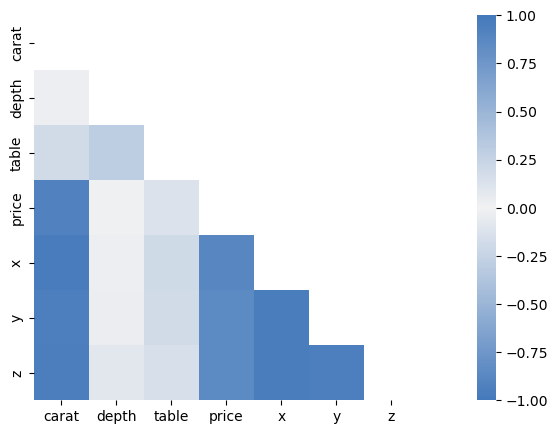

In [12]:
corr = df.drop(['cut', 'color', 'clarity'], axis=1).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0, # всегда ставить от -1 до 1 ставим два одинаковых цвета на оба конца
    square=True,
    ax=ax);

In [13]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
print(missing_summary)

Размерность датафрейма:
(40377, 10)

Сводка по отсутствующим значениям и уникальным значениям:
         Missing Values Count  Missing Values Percentage  Unique Values Count
carat                       0                        0.0                  269
cut                         0                        0.0                    5
color                       0                        0.0                    7
clarity                     0                        0.0                    8
depth                       0                        0.0                  172
table                       0                        0.0                  119
price                       0                        0.0                10397
x                           0                        0.0                  546
y                           0                        0.0                  540
z                           0                        0.0                  369


In [14]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [15]:
# Выводим список колонок и их количество в красивом формате
print(f"Список колонок:\n{list(df.columns)}")
print(f"\nОбщее количество колонок: {len(df.columns)}")


Список колонок:
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Общее количество колонок: 10


**ЗАМЕНИТЬ НА NULL - ПРАВИЛА ОБРАБОТКИ ТЕСТОВОГО И ТРЕН ДАТАСЕТА НЕ ДОЛЖНЫ ОТЛИЧАТЬСЯ \
Нужно будет явно заменить на null в тестовом датасете**

In [16]:
# df.loc[(((df['x'] <= 0) | (df['y'] <= 0)) | (df['z'] <= 0))]
len(df[(df.x == 0) | (df.y == 0) | (df.z == 0)])

13

In [17]:
len(df.loc[(((df['x'] <= 0) | (df['y'] <= 0)) | (df['z'] <= 0))])

13

In [18]:
df.shape

(40377, 10)

In [19]:
df.loc[df['x'] <= 0, 'x'] = np.nan
df.loc[df['y'] <= 0, 'y'] = np.nan
df.loc[df['z'] <= 0, 'z'] = np.nan

In [20]:
df.shape

(40377, 10)

In [21]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,price,x,y,z
4817,1.07,Ideal,F,SI2,61.6,56.0,4954,NaN,6.62,NaN
7928,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,NaN
10418,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,NaN
11203,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,NaN
13661,1.14,Fair,G,VS1,57.5,67.0,6381,NaN,NaN,NaN
15977,0.71,Good,F,SI2,64.1,60.0,2130,NaN,NaN,NaN
18359,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,NaN
23017,1.20,Premium,D,VVS1,62.1,59.0,15686,NaN,NaN,NaN
25662,1.56,Ideal,G,VS2,62.2,54.0,12800,NaN,NaN,NaN
32084,2.25,Premium,H,SI2,62.8,59.0,18034,NaN,NaN,NaN


**Видим что есть строки где все три значения np.nan \
Потом в будущем может заменим три измерения объемом, частично избавимся от мультиколлинеарности**

In [22]:
df.describe()

,carat,depth,table,price,x,y,z
count,40377.00000,40377.000000,40377.000000,40377.000000,40370.000000,40371.000000,40364.000000
mean,0.79713,61.745600,57.452126,3938.759690,5.729770,5.733738,3.538722
std,0.47404,1.420043,2.231121,3998.041468,1.120248,1.150464,0.706293
min,0.20000,43.000000,43.000000,326.000000,3.730000,3.710000,1.070000
25%,0.40000,61.000000,56.000000,946.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.000000,6.540000,6.530000,4.030000
max,5.01000,78.200000,95.000000,18818.000000,10.740000,58.900000,31.800000


In [23]:
# Прежде чем это сделать надо убрать ошибки в x y z

# df['xyz'] = df['x']*df['y']*df['z']
# df.drop(columns=['x','y','z'], axis=1, inplace=True)

In [24]:
# df[df['carat'] == 5.01000]

In [25]:
# sns.pairplot(df)

**Видим мультимодальные и не нормальные распределения - буду менять у X в будущем, мб логарифмировать \
Видим некоторые выбросы
нелинейный рост цены относительно размеров бриллианта - объясняется тем что какой нибудь 1 карат в серьге выглядит намного круче чем полкарата, поэтому и цена отличается больше чем в 2 раза**

***Попытаться рассмотреть все распределения с выбросами подробнее, разработать алгоритмические правила обработки нетривиальных случаев***

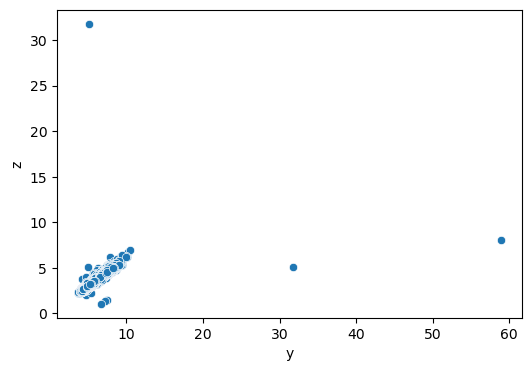

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='y', y='z', data=df)
plt.show()

In [27]:
df[(df['y'] > 25)] 

,carat,cut,color,clarity,depth,table,price,x,y,z
2455,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.8,5.12
16230,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


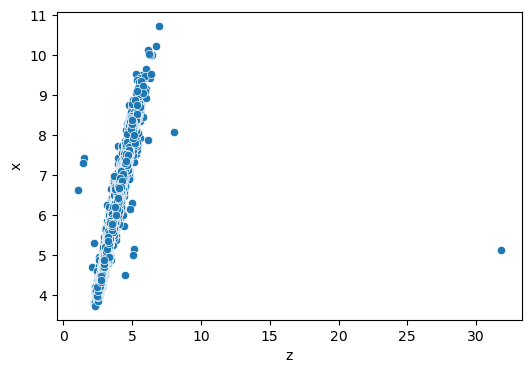

In [28]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='z', y='x', data=df)
plt.show()

In [29]:
df[(df['z'] > 30)] 

,carat,cut,color,clarity,depth,table,price,x,y,z
1895,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [30]:
# df[(df['z'] >= 0.75 * (df['x'] + df['y']) / 2)]

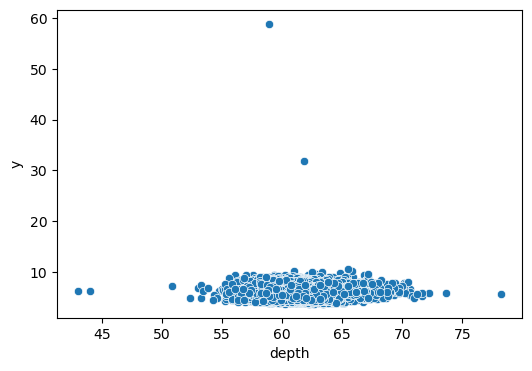

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='depth', y='y', data=df)
plt.show()

In [32]:
# df[(df['y'] > 25)] 
# те же строки
# df[(df['y'] < 9) & (df['depth'] < 45)] 
# df[(df['y'] < 9) & (df['depth'] > 75)] 

In [33]:
# Косяк расчета depth для 3к строк? 
depth_percentage = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)
df[depth_percentage != df['depth']]

# Учесть проблему чисел с правающей точкой
# Учесть что у нас некоторые размеры абсурдны
# Использовать логику расчета глубины для восстановления значений x y z !!!

,carat,cut,color,clarity,depth,table,price,x,y,z
16,0.52,Very Good,F,VVS2,61.5,57.0,2079,5.18,5.22,3.19
50,1.12,Very Good,G,SI2,63.4,57.0,3700,6.51,6.47,4.12
58,0.51,Ideal,E,VVS1,61.1,54.7,2691,5.16,5.20,3.17
95,1.00,Premium,F,VS1,61.3,59.0,6692,6.45,6.42,3.95
145,0.74,Ideal,I,SI1,61.3,56.0,2769,5.82,5.86,3.57
...,...,...,...,...,...,...,...,...,...,...
40339,0.70,Premium,F,SI2,62.9,57.0,2184,5.64,5.61,3.53
40353,1.11,Good,D,VS2,63.2,57.0,7863,6.61,6.64,4.18
40381,0.61,Ideal,J,VS2,59.7,59.0,1233,5.54,5.47,3.29
40425,2.01,Good,I,SI2,63.8,57.0,8780,8.00,7.95,5.10


In [34]:
df['calculated_depth'] = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)
df_mismatch = df[df['calculated_depth'] != df['depth']].copy()
df_mismatch['delta'] = df_mismatch['calculated_depth'] - df_mismatch['depth']
df.drop('calculated_depth', axis=1, inplace=True)


In [35]:
# df_mismatch[abs(df_mismatch['delta']) > 1]

In [36]:
# round(df_mismatch['delta'], 1).nunique()

In [37]:
# df_mismatch[round(df_mismatch['delta']).abs() > 1]

**Сначала исправим обсурдные значения, затем исправим расчет глубины**

In [38]:
df.loc[df['x'] > 20, 'x'] /= 10
df.loc[df['y'] > 20, 'y'] /= 10
df.loc[df['z'] > 20, 'z'] /= 10

In [39]:
# sns.pairplot(df)

In [40]:
# df.loc[df[['x', 'y', 'z']].notna().all(axis=1), 'depth'] = round(2 * df['z'] / (df['x'] + df['y']) * 100, 1)

In [41]:
# df[df.isna().any(axis=1)]

In [42]:
# sns.pairplot(df)

## Кастомная Метрика

In [43]:
def irq_mse(y_true, y_pred):
    delta = y_pred - y_true
    quant_75 = np.quantile(delta, 0.75)
    quant_25 = np.quantile(delta, 0.25)
    irq = quant_75 - quant_25
    mask = (delta < quant_25 - 1.5*irq) | (delta > quant_75 + 1.5*irq)
    
    if mask.sum() == 0:
        irq_mse = 0
    else:
        delta_new = delta[mask]**2
        irq_mse = -1/len(delta_new) * np.sum(delta_new)
    return irq_mse

score_irq_mse = make_scorer(irq_mse)
score_irq_mse

make_scorer(irq_mse)

## Биннинг

In [44]:
# from sklearn.preprocessing import KBinsDiscretizer

# binning = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='quantile')
# df['carat_binned'] = binning.fit_transform(df[['carat']])
# df['depth_binned'] = binning.fit_transform(df[['depth']])
# df['table_binned'] = binning.fit_transform(df[['table']])


In [45]:
# df = df.drop(['carat', 'depth', 'table'], axis=1).copy()

## Сплит + трансформеры

In [46]:
def classify_columns(df):
    numeric_columns = []
    categorical_columns = []

    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            numeric_columns.append(column)
        else:
            categorical_columns.append(column)

    return numeric_columns, categorical_columns

numeric_columns, categorical_columns = classify_columns(df)

print("Числовые колонки:", numeric_columns)
print("Категориальные колонки:", categorical_columns)

Числовые колонки: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
Категориальные колонки: ['cut', 'color', 'clarity']


In [47]:
X = df.drop('price', axis=1)
y = df['price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
cat_features = ['cut', 'color', 'clarity']
# axis_features = ['depth', 'table']
axis_features = ['x', 'y', 'z']
num_features = ['carat', 'depth', 'table']
# num_features = ['carat', 'volume']

In [50]:
# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
#     ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
# ])

# # Пайплайн для числовых признаков
# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())  # Здесь также заменяется скейлер
# ])

# # Пайплайн для категориальных признаков
# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
#     ('onehot', OneHotEncoder(sparse_output=False))  # Кодирование категориальных переменных
# ])

# # Объединение всех трансформеров в ColumnTransformer
# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')

# # Вывод информации о ColumnTransformer
# display(CT)

# ct = CT.fit_transform(X_train)

In [51]:
# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
#     ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
# ])

# # Маппинг для cut, color и clarity
# cut_map = [{
#     'col': 'cut',
#     'mapping': {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
# }]

# color_map = [{
#     'col': 'color',
#     'mapping': {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
# }]

# clarity_map = [{
#     'col': 'clarity',
#     'mapping': {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
# }]

# # Трансформеры для cut, color и clarity
# cut_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder(mapping=cut_map))
#     # ('scaler', MinMaxScaler())
# ])

# color_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder(mapping=color_map))
#     # ('scaler', MinMaxScaler())
# ])

# clarity_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('ce', ce.OrdinalEncoder(mapping=clarity_map))
#     # ('scaler', MinMaxScaler())
# ])

# # Пайплайн для числовых признаков
# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())  # Здесь также заменяется скейлер
# ])

# # Объединение всех трансформеров в ColumnTransformer
# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cut_map", cut_transformer, ['cut']),
#     ("color_map", color_transformer, ['color']),
#     ("clarity_map", clarity_transformer, ['clarity'])
# ]).set_output(transform='pandas')

# # Вывод информации о ColumnTransformer
# display(CT)

# # Применение трансформеров
# ct = CT.fit_transform(X_train)



In [52]:
# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', Ridge())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

## Затестим пачку моделей

**После более менее выстроенного пайплайна (который потом будет доработан кросс валидацией) начнем тестить разные модели что б выделить хоть парочку лидеров**

In [53]:
from sklearn.svm import SVR  # Support Vector Machine для регрессии
from sklearn.linear_model import LassoCV  # Lasso регрессия с кросс-валидацией
from sklearn.neighbors import KNeighborsRegressor  # К ближайших соседей для регрессии
from sklearn.linear_model import LarsCV  # Ларс (Least Angle Regression)
from sklearn.linear_model import RANSACRegressor  # RANSAC регрессор
from sklearn.linear_model import SGDRegressor  # Stochastic Gradient Descent для регрессии
from sklearn.linear_model import LassoLarsCV  # Lasso с LARS и кросс-валидацией
from sklearn.linear_model import OrthogonalMatchingPursuitCV  # Orthogonal Matching Pursuit с кросс-валидацией
from sklearn.linear_model import RidgeCV  # Ridge регрессия с кросс-валидацией
from sklearn.linear_model import HuberRegressor  # Huber регрессор
from sklearn.linear_model import TheilSenRegressor  # Theil-Sen регрессор
from sklearn.linear_model import PassiveAggressiveRegressor  # Passive-Aggressive регрессор



In [54]:
# ультрахорош

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SVR())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [55]:
# плохо

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', LassoCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [56]:
# Плохо но надо настраивать гиперпараметры

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', KNeighborsRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [57]:
# Ультраплохо делаю что то не так максимально
# ахахах -160 млн...

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', LarsCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [58]:
# наравне с ридж изначальной - 3,3 млн

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', RANSACRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [59]:

# Плохо но надо настраивать гиперпараметры

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SGDRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [60]:
# намного лучше чем лассо и ларс по отдельности
# но все равно плохо 3,4 млн

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', LassoLarsCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [61]:
# Очень плохо -10млн

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', OrthogonalMatchingPursuitCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [62]:
# Чуть лучше нежели обычная Ridge

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', RidgeCV())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [63]:
# Тоже не лучше чем ридж обычная

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', HuberRegressor(max_iter=100000))
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [64]:
# тоже плохо плохо

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', TheilSenRegressor(max_iter=100000))
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [65]:
# тоже слишком плохо...

# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', PassiveAggressiveRegressor())
#                             ]),
#                 transformer = PowerTransformer(method='yeo-johnson')
# )

# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

## Попробуем хорошо затюнить SVC

In [66]:
# cat_features = ['cut', 'color', 'clarity']
# axis_features = ['x', 'y', 'z']
# num_features = ['carat', 'depth', 'table']

# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
#     ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
# ])

# # Пайплайн для числовых признаков
# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())  # Здесь также заменяется скейлер
# ])

# # Пайплайн для категориальных признаков
# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
#     ('onehot', OneHotEncoder(sparse_output=False))  # Кодирование категориальных переменных
# ])

# # Объединение всех трансформеров в ColumnTransformer
# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')
# display(CT)


In [67]:
# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SVR())
#                             ]),
#                 # transformer = QuantileTransformer()
#                 transformer = PowerTransformer(method='yeo-johnson')
#                 # transformer =  PowerTransformer(method='box-cox')               
# )
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [68]:
# param_grid = {
#     # Параметры для axis_transformer
#     'regressor__preproc__axis_transformer__polynom__degree': [2, 3],
#     'regressor__preproc__axis_transformer__scaler': [RobustScaler(), StandardScaler(), MinMaxScaler()],
    
#     # Параметры для числовых признаков
#     'regressor__preproc__num__scaler': [RobustScaler(), StandardScaler(), MinMaxScaler()],
   
#     # Параметры для SVR (основной модели)
#     'regressor__estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'regressor__estimator__C': [0.1, 1, 10, 100, 1000],
#     'regressor__estimator__gamma': ['scale', 'auto'],
    
#     # Параметры для трансформера целевой переменной
#     'transformer': [PowerTransformer(method='yeo-johnson'), PowerTransformer(method='box-cox')]
# }

# # Определение RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=model_target,
#     param_distributions=param_grid,  # Используем param_distributions вместо param_grid
#     n_iter=1,                       # Количество случайных комбинаций для проверки (настраивается)
#     cv=4,                            # Количество фолдов для кросс-валидации
#     scoring=score_irq_mse, # Используем свою метрику
#     verbose=2,
#     n_jobs=-1,
#     random_state=42,                 # Фиксируем seed для воспроизводимости
# )

# # Запуск случайного поиска
# random_search.fit(X_train, y_train)
# print(f"Лучшие параметры: {random_search.best_params_}")
# print(f"Лучшее значение MSE: {random_search.best_score_:.2f}")



## Логарифмирование целевой переменной

In [69]:
# y_train_transformed = np.log1p(y_train)  # Применяем логарифмическую трансформацию к целевой переменной
# y_test_transformed = np.log1p(y_test)

In [70]:
# # model_target =  TransformedTargetRegressor(
# #                 regressor = Pipeline(steps=[
# #                                 ('preproc', CT),
# #                                 ('estimator', SVR())
# #                             ]),
# #                 # transformer = QuantileTransformer()
# #                 transformer = PowerTransformer(method='yeo-johnson')
# #                 # transformer =  PowerTransformer(method='box-cox')               
# # )
# model_target = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SVR())
#                             ])

# model_target.fit(X_train, y_train_transformed)
# y_pred_log = model_target.predict(X_test)
# y_pred = np.expm1(y_pred_log)  # Обратная трансформация

# mse = mean_squared_error(y_test_transformed, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

In [71]:
# sns.histplot(y_train_transformed, kde=True)
# plt.title('Распределение цены после логарифмической трансформации')
# plt.show()

## Поли фичи 3 (особой разницы нет) / все фичи в axis (-2,4 млн) / carat, depth, table в axis и xyz в num (-2,6 млн)

In [72]:
# cat_features = ['cut', 'color', 'clarity']
# axis_features = ['x', 'y', 'z', 'carat']
# num_features = ['table', 'depth']

# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),  # Поставить True, если модель не имеет свободного члена
#     ('scaler', RobustScaler())  # Это место будет заменяться скейлерами через GridSearchCV
# ])

# Пайплайн для числовых признаков
# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())  # Здесь также заменяется скейлер
# ])

# # Пайплайн для категориальных признаков
# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),  # Заполнение пропусков наиболее частым значением
#     ('onehot', OneHotEncoder(sparse_output=False))  # Кодирование категориальных переменных
# ])

# # Объединение всех трансформеров в ColumnTransformer
# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')
# display(CT)


In [73]:
# model_target =  TransformedTargetRegressor(
#                 regressor = Pipeline(steps=[
#                                 ('preproc', CT),
#                                 ('estimator', SVR())
#                             ]),
#                 # transformer = QuantileTransformer()
#                 transformer = PowerTransformer(method='yeo-johnson')
#                 # transformer =  PowerTransformer(method='box-cox')               
# )
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(irq_mse(y_test, y_pred))

**Добавление carat в axis помогло стабилизировать метрику + теперь метрика находится в пределах 1,7-1,8млн \
Такой же эксперимент с table и depth не прокатил \
При этом такая метрика вылетает только если не использовать Robust на num, что весьма странно**

## Отбор признаков через SelectKBest

**всего признаков 36**

In [74]:
# cat_features = ['cut', 'color', 'clarity']
# axis_features = ['x', 'y', 'z', 'carat']
# num_features = ['depth', 'table']

# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),
#     ('scaler', RobustScaler())
# ])

# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())
# ])

# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
# ])

# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')

# pipeline = Pipeline(steps=[
#     ('preproc', CT),
#     ('feature_selection', SelectKBest(score_func=f_regression, k=35)),  # Настройте k под ваши данные
#     ('estimator', SVR())
# ])

# model_target = TransformedTargetRegressor(
#     regressor=pipeline,
#     transformer=PowerTransformer(method='yeo-johnson')
# )

# display(model_target)

In [75]:
# # Обучение модели
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# # Оценка модели по вашей метрике
# print(irq_mse(y_test, y_pred))

# # Получение отобранных признаков
# feature_names = model_target.regressor_['preproc'].get_feature_names_out()
# mask = model_target.regressor_['feature_selection'].get_support()
# selected_features = feature_names[mask]
# print("Выбранные признаки:", selected_features)

**Позволяет при отборе 35 признаков стабильно держать метрику на уровне 1,8-1,875 ляма без настройки гиперпаарметров**

## Проверка теории комментирования num и подбора k в SelectKBest

In [76]:
# cat_features = ['cut', 'color', 'clarity']
# axis_features = ['x', 'y', 'z', 'carat']
# num_features = ['depth', 'table']

# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),
#     ('scaler', RobustScaler())
# ])

# # num = Pipeline(steps=[
# #     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
# #     ('scaler', RobustScaler())
# # ])

# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
# ])

# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     # ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')

# pipeline = Pipeline(steps=[
#     ('preproc', CT),
#     ('feature_selection', SelectKBest(score_func=f_regression, k='all')),  # Настройте k под ваши данные
#     ('estimator', SVR())
# ])

# model_target = TransformedTargetRegressor(
#     regressor=pipeline,
#     transformer=PowerTransformer(method='yeo-johnson')
# )

# display(model_target)

In [77]:
# # Обучение модели
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# # Оценка модели по вашей метрике
# print(irq_mse(y_test, y_pred))

# # Получение отобранных признаков
# feature_names = model_target.regressor_['preproc'].get_feature_names_out()
# mask = model_target.regressor_['feature_selection'].get_support()
# selected_features = feature_names[mask]
# print("Выбранные признаки:", selected_features)

**Не очень понятно почему, но в среднем действительно на 30-50 тысяч метрика лучше либо где то 1,82 ляма получается стабильно**

## Перебор параметров

In [78]:
# cat_features = ['cut', 'color', 'clarity']
# axis_features = ['x', 'y', 'z', 'carat']
# num_features = ['depth', 'table']

# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),
#     ('scaler', RobustScaler())
# ])

# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, max_iter=20)),
#     ('scaler', RobustScaler())
# ])

# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
# ])

# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')

# pipeline = Pipeline(steps=[
#     ('preproc', CT),
#     ('feature_selection', SelectKBest(score_func=f_regression, k=35)),  # Настройте k под ваши данные
#     ('estimator', SVR())
# ])

# model_target = TransformedTargetRegressor(
#     regressor=pipeline,
#     transformer=PowerTransformer(method='yeo-johnson')
# )

# display(model_target)

In [79]:
# # Обучение модели
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# # Оценка модели по вашей метрике
# print(irq_mse(y_test, y_pred))

# # Получение отобранных признаков
# feature_names = model_target.regressor_['preproc'].get_feature_names_out()
# mask = model_target.regressor_['feature_selection'].get_support()
# selected_features = feature_names[mask]
# print("Выбранные признаки:", selected_features)

In [80]:
# param_grid = {
#     # Параметры для axis_transformer
#     'regressor__preproc__axis_transformer__polynom__degree': [2],
#     'regressor__preproc__axis_transformer__scaler': [RobustScaler(), StandardScaler(), MinMaxScaler()],
    
#     # Параметры для числовых признаков
#     'regressor__preproc__num__scaler': [RobustScaler(), StandardScaler(), MinMaxScaler()],
   
#     # Параметры для SVR (основной модели)
#     'regressor__estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'regressor__estimator__C': [10, 100, 1000],
#     'regressor__estimator__gamma': ['scale', 'auto'],
    
#     # Параметры для трансформера целевой переменной
#     'transformer': [PowerTransformer(method='yeo-johnson'), PowerTransformer(method='box-cox')]
# }

# random_search = RandomizedSearchCV(
#     estimator=model_target,
#     param_distributions=param_grid,  # Используем param_distributions вместо param_grid
#     n_iter=10,                       # Количество случайных комбинаций для проверки (настраивается)
#     cv=4,                            # Количество фолдов для кросс-валидации
#     scoring=score_irq_mse, # Используем свою метрику
#     verbose=2,
#     n_jobs=-1,
#     random_state=42,                 # Фиксируем seed для воспроизводимости
# )

# # Запуск случайного поиска
# random_search.fit(X_train, y_train)

# grid_results = pd.DataFrame(grid.cv_results_)
# display(grid_results.sort_values(['rank_test_score']).T)

In [81]:
# print(f"Лучшие параметры: {random_search.best_params_}")

## Выборочно подбираю параметры

**Выберу rbf ядро, тк оно сможет учесть нелийненые зависимости**

In [82]:
# X = df.drop('price', axis=1)
# y = df['price']

In [83]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [1]:
# -2367721.2999663167


# cat_features = ['cut', 'color', 'clarity']
# axis_features = ['x', 'y', 'z', 'carat']
# num_features = ['depth', 'table']

# axis_transformer = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, initial_strategy='mean')),
#     ('polynom', PolynomialFeatures(2, include_bias=False)),
#     ('scaler', RobustScaler())
# ])

# num = Pipeline(steps=[
#     ('missing_num', IterativeImputer(missing_values=np.nan, initial_strategy='mean')),
#     ('scaler', RobustScaler())
# ])

# cat = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
# ])

# CT = ColumnTransformer([
#     ("axis_transformer", axis_transformer, axis_features),
#     ("num", num, num_features),
#     ("cat", cat, cat_features)
# ]).set_output(transform='pandas')

# pipeline = Pipeline(steps=[
#     ('preproc', CT),
#     ('feature_selection', SelectKBest(score_func=f_regression, k=35)),  # Настройте k при необходимости
#     ('estimator', SVR(kernel='rbf', epsilon=0.1, gamma='scale', C=100))
# ])

# model_target = TransformedTargetRegressor(
#     regressor=pipeline,
#     transformer=PowerTransformer(method='yeo-johnson')
# )

# display(model_target)

In [85]:
# model_target.fit(X_train, y_train)
# y_pred = model_target.predict(X_test)

# # Оценка модели по вашей метрике
# print(irq_mse(y_test, y_pred))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


-2367721.2999663167


## Какие значения есть в test ? 

In [4]:
# см тюн моделс